In [10]:
# Load required librairies.
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# Display n rows from pandas outputs

pd.options.display.max_rows = 4000

# pip install --upgrade matplotlib

In [2]:
# Load required data sets.

rentals = pd.read_csv('zillow_rentals.csv')
sales = pd.read_csv('zillow_sales.csv')

In [3]:
#Summarize Rentals data set.

print(rentals.head())
print(rentals.info())
print(rentals.describe())
print(rentals.columns)
print(rentals.index)

   RegionID  SizeRank  RegionName RegionType StateName State      City  \
0     61639         0       10025        Zip        NY    NY  New York   
1     84654         1       60657        Zip        IL    IL   Chicago   
2     61637         2       10023        Zip        NY    NY  New York   
3     91982         3       77494        Zip        TX    TX      Katy   
4     84616         4       60614        Zip        IL    IL   Chicago   

                              Metro       CountyName  1996-01-31  ...  \
0       New York-Newark-Jersey City  New York County    190910.0  ...   
1          Chicago-Naperville-Elgin      Cook County    263059.0  ...   
2       New York-Newark-Jersey City  New York County    264057.0  ...   
3  Houston-The Woodlands-Sugar Land    Harris County    201890.0  ...   
4          Chicago-Naperville-Elgin      Cook County    353798.0  ...   

   2020-09-30  2020-10-31  2020-11-30  2020-12-31  2021-01-31  2021-02-28  \
0   1017983.0   1019412.0   1021002.0  

In [6]:
# Select last months data

rentals[['RegionName','2021-06-30']]
sales[['RegionName','2021-06']]

,RegionName,2021-06
0,10025,2820.0
1,60657,1623.0
2,10023,2807.0
3,77494,1497.0
4,60614,1899.0
...,...,...
1738,23507,1205.0
1739,60606,1952.0
1740,10006,2656.0
1741,2109,2783.0


In [4]:
# Merge Rentals and Sales Tables

rs = pd.merge(rentals, sales, how="inner", on="RegionName")
print(rs.info())
print(rs)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1742 entries, 0 to 1741
Columns: 408 entries, RegionID_x to 2021-06
dtypes: float64(396), int64(5), object(7)
memory usage: 5.4+ MB
None
      RegionID_x  SizeRank_x  RegionName RegionType StateName State      City  \
0          61639           0       10025        Zip        NY    NY  New York   
1          84654           1       60657        Zip        IL    IL   Chicago   
2          61637           2       10023        Zip        NY    NY  New York   
3          91982           3       77494        Zip        TX    TX      Katy   
4          84616           4       60614        Zip        IL    IL   Chicago   
...          ...         ...         ...        ...       ...   ...       ...   
1737       67751       11038       23507        Zip        VA    VA   Norfolk   
1738       84608       11990       60606        Zip        IL    IL   Chicago   
1739       61620       12012       10006        Zip        NY    NY  New York   
174

Text(0, 0.5, 'Days Square')

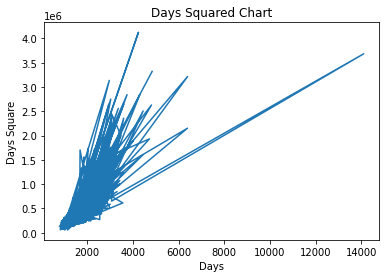

In [13]:
# Print Plots
x_1 = rs[['2021-06']]
y_1 = rs[['2021-06-30']]
plt.plot(x_1,y_1)
plt.title('Days Squared Chart')
plt.xlabel('Days')
plt.ylabel('Days Square')

In [ ]:
#Print Multiple Plots


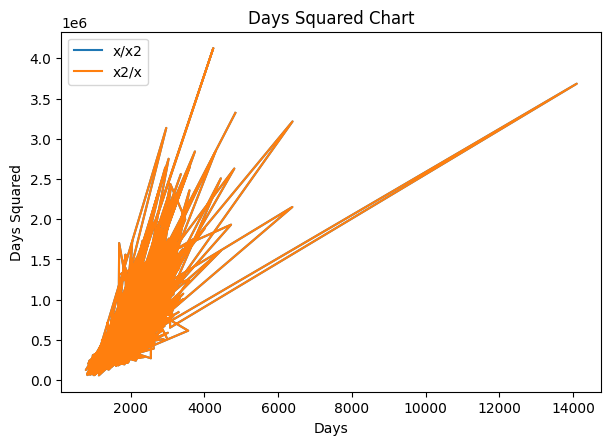

In [18]:
# 
fig_1 = plt.figure(dpi=100)
axes_1 = fig_1.add_axes([0.1,0.1,0.9,0.9])
axes_1.set_xlabel('Days')
axes_1.set_ylabel('Days Squared')
axes_1.set_title('Days Squared Chart')
axes_1.plot(x_1,y_1,label='x/x2')
axes_1.plot(x_1,y_1,label='x2/x')
axes_1.legend(loc=0)

<BarContainer object of 20 artists>

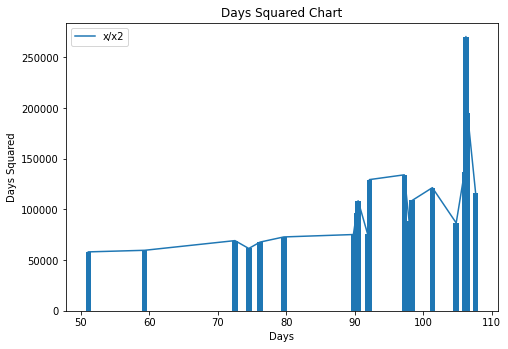

In [34]:
# Figure 2.0: SR Ratio to Rentals

rs2 = rs[["RegionName", "Metro", "sales_to_rental", "2021-06-30", "2021-06"]].nsmallest(20, columns="sales_to_rental").sort_values(by='sales_to_rental')
np_arr = rs2.values
x_2 = np_arr[:,2]
y_2 = np_arr[:,3]
fig_4 = plt.figure(figsize=(6,4))
axes_4 = fig_4.add_axes([0,0,1,1])

axes_4.set_xlabel('Days')
axes_4.set_ylabel('Days Squared')
axes_4.set_title('Days Squared Chart')
axes_4.plot(x_2,y_2,label='x/x2')
axes_4.legend(loc=0)
plt.bar(x_2,y_2)

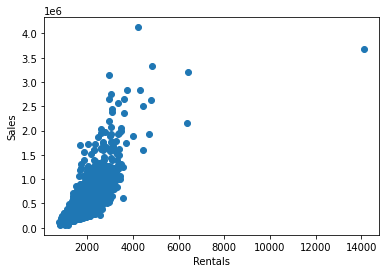

In [5]:
# Create a scatter plot of the sales and rentals data

plt.scatter(rs[['2021-06']], rs[['2021-06-30']])
plt.xlabel('Rentals')
plt.ylabel('Sales')
plt.show()

In [6]:
# Divide Sales by Rentals for the Sales to Rentals Ratio to be added to the data frame

rs["sales_to_rental"] = rs["2021-06-30"] / rs["2021-06"]
print(rs)

# rs3 = rs2.dropna()

      RegionID_x  SizeRank_x  RegionName RegionType StateName State      City  \
0          61639           0       10025        Zip        NY    NY  New York   
1          84654           1       60657        Zip        IL    IL   Chicago   
2          61637           2       10023        Zip        NY    NY  New York   
3          91982           3       77494        Zip        TX    TX      Katy   
4          84616           4       60614        Zip        IL    IL   Chicago   
...          ...         ...         ...        ...       ...   ...       ...   
1737       67751       11038       23507        Zip        VA    VA   Norfolk   
1738       84608       11990       60606        Zip        IL    IL   Chicago   
1739       61620       12012       10006        Zip        NY    NY  New York   
1740       58623       12690        2109        Zip        MA    MA    Boston   
1741       84604       18836       60602        Zip        IL    IL   Chicago   

                           

In [7]:
rs[["RegionName", "Metro", "sales_to_rental", "2021-06-30", "2021-06"]].nsmallest(1000, columns="sales_to_rental")
# rs[["RegionName", "Metro", "sales_to_rental", "2021-06-30", "2021-06"]].nlargest(1000, columns="sales_to_rental")
# rs["sales_to_rental"].describe()

,RegionName,Metro,sales_to_rental,2021-06-30,2021-06
1524,21223,Baltimore-Columbia-Towson,51.133685,58139.0,1137.0
522,63136,St. Louis,59.346918,59703.0,1006.0
547,48235,Detroit-Warren-Dearborn,72.523560,69260.0,955.0
1562,45405,Dayton,74.541818,61497.0,825.0
1548,40211,Louisville/Jefferson County,76.193258,67812.0,890.0
1517,64130,Kansas City,79.657923,72887.0,915.0
829,38127,Memphis,89.806683,75258.0,838.0
1248,48089,Detroit-Warren-Dearborn,90.266854,96405.0,1068.0
308,19134,Philadelphia-Camden-Wilmington,90.492500,108591.0,1200.0
1186,46218,Indianapolis-Carmel-Anderson,91.868357,76067.0,828.0


C:\Users\arispenj\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


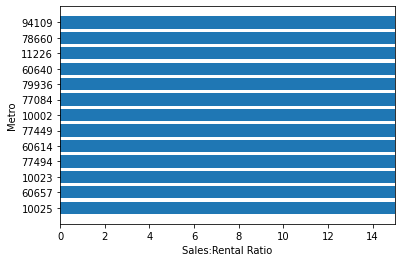

In [8]:
fig, ax = plt.subplots()
fig01d = rs[["RegionName", "Metro", "sales_to_rental", "2021-06-30", "2021-06"]].sort_values(["sales_to_rental"], ascending=True).query('100 <= sales_to_rental <= 116')
#.nsmallest(40, columns="sales_to_rental")
y_pos = fig01d["Metro"]
x_pos = fig01d["sales_to_rental"]
hbars = ax.barh(y_pos, x_pos, height=0.8, align='center')
ax.set_yticklabels(rs["RegionName"])
ax.set_xlabel('Sales:Rental Ratio')
ax.set_ylabel('Metro')

# Label with specially formatted floats
ax.bar_label(hbars, fmt='%.2f')
ax.set_xlim(right=15)  # adjust xlim to fit labels

plt.show()

In [15]:
fig01d = rs[["RegionName", "Metro", "sales_to_rental", "2021-06-30", "2021-06"]]
fig01d = fig01d.nsmallest(100, columns="sales_to_rental")
fig01d = fig01d.sort_values(["sales_to_rental"], ascending=False)

fig01d = rs[["RegionName", "Metro", "sales_to_rental", "2021-06-30", "2021-06"]].nsmallest(100, columns="sales_to_rental").sort_values(["sales_to_rental"], ascending=True) #.query('100 <= sales_to_rental <= 116')

print(fig01d)

      RegionName                                  Metro  sales_to_rental  \
1524       21223              Baltimore-Columbia-Towson        51.133685   
522        63136                              St. Louis        59.346918   
547        48235                Detroit-Warren-Dearborn        72.523560   
1562       45405                                 Dayton        74.541818   
1548       40211            Louisville/Jefferson County        76.193258   
1517       64130                            Kansas City        79.657923   
829        38127                                Memphis        89.806683   
1248       48089                Detroit-Warren-Dearborn        90.266854   
308        19134         Philadelphia-Camden-Wilmington        90.492500   
1186       46218           Indianapolis-Carmel-Anderson        91.868357   
730        33417  Miami-Fort Lauderdale-West Palm Beach        92.140214   
1026       21217              Baltimore-Columbia-Towson        97.232609   
931        3

In [ ]:
rs[rs["Metro"] == "New York-Newark-Jersey City"].sort_values(["RegionName"], ascending=False)

In [79]:
# import sklearn as sklearn
from sklearn import linear_model

# Create linear regression object
reg = linear_model.LinearRegression()

X = rs2.loc[:,['2021-05-31','2021-06-30']]
X.shape

y = rs2["2021-06"]
y.shape

# Train model using the training set
reg.fit(X, y)

#Predict
reg_pred = reg.predict(X)

In [78]:
# The coefficients
print('Coefficients: \n', reg.coef_)

Coefficients: 
 [ 0.00289837 -0.00167547]


In [82]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y, reg_pred))

NameError: name 'mean_squared_error' is not defined

In [83]:
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y, reg_pred))

NameError: name 'r2_score' is not defined

ValueError: x and y must be the same size

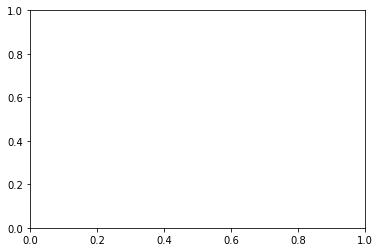

In [86]:
# Plot outputs
plt.scatter(X, y,  color='black')
plt.plot(X, reg_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [88]:
print(y)

0        2820.0
1        1623.0
2        2807.0
3        1497.0
4        1899.0
5        1567.0
6        2643.0
7        1362.0
8        1027.0
9        1436.0
10       1928.0
11       1432.0
12       2408.0
13       2881.0
14       1687.0
15       1750.0
16       2988.0
17       2009.0
18       1788.0
19       1357.0
20       1338.0
21       2518.0
22       1354.0
23       1560.0
24       1430.0
25       2966.0
26       2010.0
27       2214.0
28       1648.0
29       1483.0
30       1605.0
31       1564.0
32       1397.0
33       1556.0
34       2457.0
35       2430.0
36       2314.0
37       2178.0
38       1634.0
39       1312.0
40       1622.0
41       1528.0
42       2899.0
43       1477.0
44       2843.0
45       1753.0
46       1373.0
47       1748.0
48       2070.0
49       1728.0
50       1626.0
51       2344.0
52       2612.0
53       2148.0
54       1726.0
55       2292.0
56       1819.0
57       1240.0
58       1452.0
59       1233.0
60       2516.0
61       1202.0
62      

In [57]:
rs.head(10)

,RegionID_x,SizeRank_x,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,...,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,sales_to_rental
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,190910.0,...,2958.0,2939.0,2919.0,2900.0,2883.0,2865.0,2848.0,2834.0,2820.0,389.668794
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,263059.0,...,1642.0,1639.0,1636.0,1634.0,1631.0,1629.0,1627.0,1625.0,1623.0,318.531731
2,61637,2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,264057.0,...,2968.0,2946.0,2924.0,2902.0,2881.0,2861.0,2841.0,2824.0,2807.0,390.831493
3,91982,3,77494,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,201890.0,...,1443.0,1449.0,1456.0,1462.0,1469.0,1476.0,1483.0,1490.0,1497.0,262.430194
4,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,353798.0,...,1918.0,1915.0,1912.0,1909.0,1906.0,1904.0,1902.0,1900.0,1899.0,346.879410
5,91940,5,77449,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,98327.0,...,1464.0,1477.0,1489.0,1502.0,1515.0,1527.0,1540.0,1553.0,1567.0,143.104020
6,61616,6,10002,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,380291.0,...,2840.0,2813.0,2786.0,2759.0,2734.0,2709.0,2685.0,2664.0,2643.0,380.915248
7,91733,7,77084,Zip,TX,TX,Houston,Houston-The Woodlands-Sugar Land,Harris County,98491.0,...,1307.0,1313.0,1320.0,1327.0,1333.0,1340.0,1347.0,1354.0,1362.0,163.070485
8,93144,8,79936,Zip,TX,TX,El Paso,El Paso,El Paso County,83021.0,...,984.0,989.0,994.0,1000.0,1005.0,1011.0,1016.0,1021.0,1027.0,156.010711
9,84640,9,60640,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,155709.0,...,1454.0,1452.0,1449.0,1447.0,1445.0,1442.0,1440.0,1438.0,1436.0,233.661560


In [74]:
rs2 = rs[["2021-05-31","2021-06-30","2021-06"]]
rs2 = rs2.fillna(1)

In [65]:
x = rs2.loc[:,['2021-05-31','2021-06-30']]
x.shape

(1742, 2)

In [66]:
y = rs2["2021-06"]
y.shape

(1742,)